# Importando paquetes

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [109]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)

# Leyendo el archivo

In [76]:
df = pd.read_pickle('EasyMoney_1.pkl', compression='zip')

In [77]:
df.head() # comprobando que lo ha leído bien

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ,dif_loans,dif_mortgage,dif_funds,dif_securities,dif_long_term_deposit,dif_em_account_pp,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,cliente_activo,cuenta,ahorro_inversion,financiacion
0,15891,2018-07-28,2018-07-28,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,H,59,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,1,0.0,1,0,0,0
1,15891,2018-08-28,2018-07-28,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,59,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,1.000000,0,0,0.0,1,-1,0,0
2,16063,2018-11-28,2018-11-19,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.290323,1,0,0.0,0,0,0,0
3,16063,2018-12-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.258065,0,0,0.0,0,0,0,0
4,16063,2019-01-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.258065,0,0,0.0,0,0,0,0


Queremos hacer una agrupación de los clientes (activos) en el último mes (mayo de 2019), por lo que seleccionamos un subset de la muestra.

In [78]:
df_mayo = df.query('(pk_partition=="2019-05-28")&(cliente_activo==1)')

In [79]:
df_mayo.drop(['cuenta', 'ahorro_inversion', 'financiacion'], axis=1, inplace=True)
#las elimino para evitar confusiones

/var/folders/v8/ttzsnn891fd42qm8ffd92scm0000gp/T/ipykernel_5616/3709473281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mayo.drop(['cuenta', 'ahorro_inversion', 'financiacion'], axis=1, inplace=True)


In [80]:
cuentas= ['debit_card','em_account_p','em_account_pp','em_acount','emc_account','payroll','payroll_account']

In [81]:
df_cuentas=df_mayo.melt(id_vars=['pk_cid'],
              value_vars=cuentas,
              var_name='Producto',
              value_name='Conteo')

In [82]:
df_cuentas=df_cuentas.groupby(['pk_cid'])['Conteo'].sum().reset_index()

In [83]:
df_cuentas.rename(columns={'Conteo':'cuentas_totales'}, inplace=True)

In [84]:
df_cuentas

,pk_cid,cuentas_totales
0,16203,1
1,16502,2
2,17457,2
3,17799,1
4,17970,3
...,...,...
344699,1553456,1
344700,1553541,1
344701,1553559,1
344702,1553565,1


## Variable total ahorro

In [85]:
productos_ahorro=['funds','long_term_deposit','mortgage','pension_plan','securities','short_term_deposit']

In [86]:
df_ahorro=df_mayo.melt(id_vars='pk_cid',
                       value_vars=productos_ahorro,
                       var_name='Producto',
                       value_name='Conteo')

In [87]:
df_ahorro=df_ahorro.groupby(['pk_cid'])['Conteo'].sum().reset_index()

In [88]:
df_ahorro.rename(columns={'Conteo':'ahorro_total'}, inplace=True)

## Variable total financiación

In [89]:
productos_financiacion = ['loans','credit_card']

In [90]:
df_financiacion=df_mayo.melt(id_vars='pk_cid',
                             value_vars=productos_financiacion,
                             var_name='Producto',
                             value_name='Conteo')

In [91]:
df_financiacion=df_financiacion.groupby(['pk_cid'])['Conteo'].sum().reset_index()

In [92]:
df_financiacion.rename(columns={'Conteo':'financiacion_total'}, inplace=True)

Juntamos las 3 columnas como variables de df_mayo

In [93]:
df_mayo=df_mayo.merge(df_cuentas,how='inner',on=['pk_cid'])\
    .merge(df_ahorro,how='inner',on=['pk_cid'])\
    .merge(df_financiacion,how='inner',on=['pk_cid'])

In [94]:
df_mayo.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ,dif_loans,dif_mortgage,dif_funds,dif_securities,dif_long_term_deposit,dif_em_account_pp,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,cliente_activo,cuentas_totales,ahorro_total,financiacion_total
0,16203,2019-05-28,2018-12-23,KAT,1,top,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,8.0,V,70,0,-999.00,Barcelona,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.032258,0,1,0.0,1,1,0,0
1,16502,2019-05-28,2018-09-30,KHN,1,particulares,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,ES,28.0,H,58,0,-999.00,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.741935,0,2,0.0,1,2,0,0
2,17457,2019-05-28,2017-09-16,KAT,1,particulares,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,ES,28.0,H,54,0,102405.75,Madrid,salario_medioalto,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19.967742,0,3,10.0,1,2,1,0
3,17799,2019-05-28,2018-01-04,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,H,47,0,84511.86,Madrid,salario_mediobajo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.419355,0,1,0.0,1,1,0,0
4,17970,2019-05-28,2015-04-16,KAT,1,particulares,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,ES,28.0,V,76,0,-999.00,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.483871,0,5,0.0,1,3,2,0


Convertimos variables categóricas para poder usarlas en el clustering

In [95]:
dummy_genero = pd.get_dummies(df_mayo['gender'],prefix='gender')
dummy_segment = pd.get_dummies(df_mayo['segment'],prefix='segment')
dummy_region_name = pd.get_dummies(df_mayo['region_name'],prefix='region')

In [96]:
datasets = [dummy_genero, dummy_segment, dummy_region_name]

for dataset in datasets:
    df_mayo = pd.concat([df_mayo, dataset], axis=1)

In [97]:
df_mayo.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ,dif_loans,dif_mortgage,dif_funds,dif_securities,dif_long_term_deposit,dif_em_account_pp,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,cliente_activo,cuentas_totales,ahorro_total,financiacion_total,gender_H,gender_V,gender_desconocido,segment_desconocido,segment_particulares,segment_top,segment_universitario,region_Alava,region_Albacete,region_Alicante,region_Almeria,region_Avila,region_Badajoz,region_Baleares,region_Barcelona,region_Burgos,region_Caceres,region_Cadiz,region_Castellon,region_Ciudad Real,region_Cordoba,region_La Coruna,region_Cuenca,region_Gerona,region_Granada,region_Guadalajara,region_Guipuzcoa,region_Huelva,region_Huesca,region_Jaen,region_Leon,region_Lerida,region_La Rioja,region_Lugo,region_Madrid,region_Malaga,region_Murcia,region_Navarra,region_Orense,region_Asturias,region_Palencia,region_Las Palmas,region_Pontevedra,region_Salamanca,region_Santa Cruz de Tenerife,region_Cantabria,region_Segovia,region_Sevilla,region_Soria,region_Tarragona,region_Teruel,region_Toledo,region_Valencia,region_Valladolid,region_Vizcaya,region_Zamora,region_Zaragoza,region_Ceuta,region_Melilla,region_Desconocido
0,16203,2019-05-28,2018-12-23,KAT,1,top,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,8.0,V,70,0,-999.00,Barcelona,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.032258,0,1,0.0,1,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,16502,2019-05-28,2018-09-30,KHN,1,particulares,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,ES,28.0,H,58,0,-999.00,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.741935,0,2,0.0,1,2,0,0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,17457,2019-05-28,2017-09-16,KAT,1,particulares,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,ES,28.0,H,54,0,102405.75,Madrid,salario_medioalto,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19.967742,0,3,10.0,1,2,1,0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,17799,2019-05-28,2018-01-04,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,H,47,0,84511.86,Madrid,salario_mediobajo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.419355,0,1,0.0,1,1,0,0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,17970,2019-05-28,2015-04-16,KAT,1,particulares,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,ES,28.0,V,76,0,-999.00,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.483871,0,5,0.0,1,3,2,0,False,True,False,False,True,False,False,False,False,False,False,F

# Segmentación

In [98]:
regiones = dummy_region_name.columns.to_list()

In [99]:
caract= ['meses_alta','salary','age', 'ingresos_producto', 
            'gender_H','gender_V','gender_desconocido','segment_desconocido',
            'segment_particulares',	'segment_top','segment_universitario',
            'cuentas_totales','ahorro_total','financiacion_total']
variables=caract+regiones

In [100]:
for x in datasets:
    del x

In [101]:
valores_k=range(1,10)
inercias=[]

for k in valores_k:
    pipeline= Pipeline(steps=[('StandardScaler',StandardScaler()),
                          ('KMeans',KMeans(n_clusters=k, random_state=42))])
    pipeline.fit(df_mayo[variables])
    inercias.append(pipeline.named_steps['KMeans'].inertia_)

/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

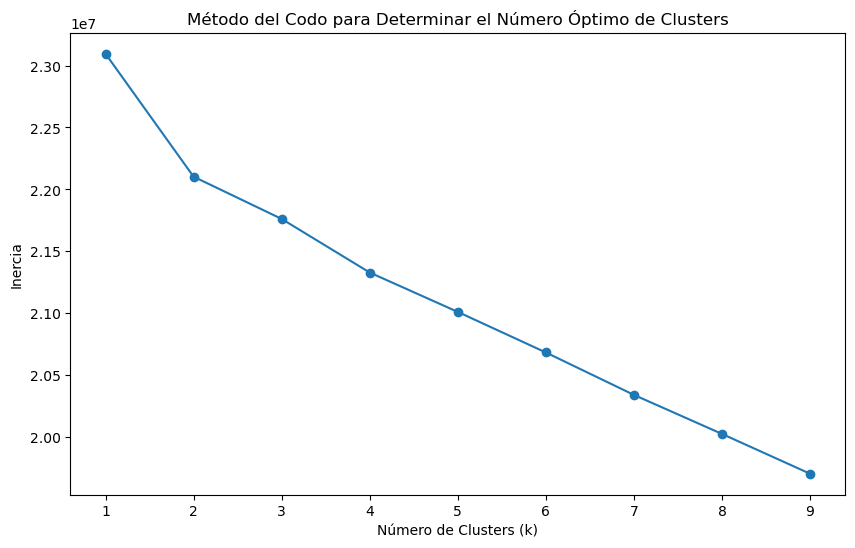

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(valores_k, inercias, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

In [103]:
k_optimo = 5

# Añade la columna 'Cluster' al DataFrame con el número óptimo de clusters
pipeline = Pipeline(steps=[
    ('StandardScaler', StandardScaler()),
    ('KMeans', KMeans(n_clusters=k_optimo, random_state=42))
])

pipeline.fit(df_mayo[variables])
df_mayo['Cluster'] = pipeline.predict(df_mayo[variables])

/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [104]:
df_mayo[['pk_cid','Cluster']].to_csv('Clientes_clustering_completo.csv')

In [105]:
df_mayo.to_csv('df_completo_cluster3.csv')

In [106]:
df_mayo[df_mayo.select_dtypes(bool).columns]=df_mayo.select_dtypes(bool).astype('Int64')

In [107]:
caract_cluster=df_mayo.select_dtypes(include=np.number).groupby('Cluster').agg(np.mean)

In [110]:
caract_cluster.T

Cluster,0,1,2,3,4
pk_cid,1301331.345536,1257660.598664,1251510.396614,1262774.469175,1279895.710616
active_customer,0.396532,0.34934,0.323215,0.497705,0.787913
short_term_deposit,0.0,0.0,0.0,0.0,0.000018
loans,0.0,0.000063,0.000008,0.0,0.000206
mortgage,0.0,0.0,0.000008,0.0,0.000197
funds,0.00167,0.000645,0.000284,0.00117,0.010714
securities,0.001927,0.001374,0.000284,0.00261,0.014187
long_term_deposit,0.007193,0.001047,0.00081,0.0054,0.052198
em_account_pp,0.0,0.0,0.0,0.0,0.0
credit_card,0.011689,0.001639,0.001319,0.00675,0.038783


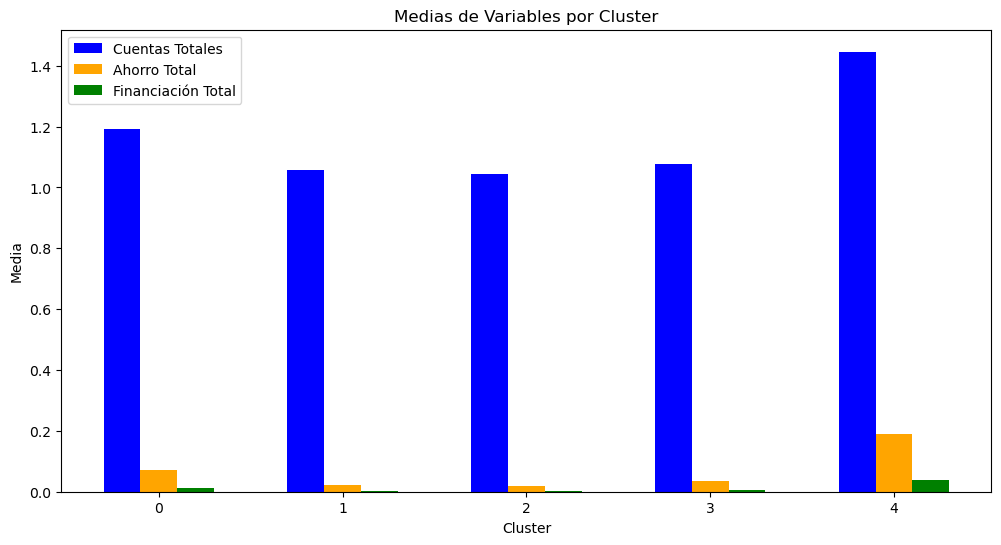

In [111]:
# Sample data
clusters = caract_cluster.index
cuentas_totales = caract_cluster['cuentas_totales']
ahorro_total = caract_cluster['ahorro_total']
financiacion_total = caract_cluster['financiacion_total']

# Set up colors
colors = ['blue', 'orange', 'green']

# Plot bar charts
width = 0.2  # Width of each bar
x = np.arange(len(clusters))

plt.figure(figsize=(12, 6))

# Bar charts for each variable
plt.bar(x - width, cuentas_totales, width, label='Cuentas Totales', color=colors[0])
plt.bar(x, ahorro_total, width, label='Ahorro Total', color=colors[1])
plt.bar(x + width, financiacion_total, width, label='Financiación Total', color=colors[2])

# Customize the plot
plt.title('Medias de Variables por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Media')
plt.xticks(x, clusters)
plt.legend()
plt.show()

In [113]:
grupo_0=df_mayo.query('Cluster==0')
grupo_1=df_mayo.query('Cluster==1')
grupo_2=df_mayo.query('Cluster==2')
grupo_3=df_mayo.query('Cluster==3')
grupo_4=df_mayo.query('Cluster==4')

In [114]:
def productos_cluster(grupo, numero):
    datos_grafico=grupo.describe().T.iloc[5:19,1]
    productos=datos_grafico.index
    valores=datos_grafico.values

    plt.figure(figsize=(5,4))
    plt.bar(productos, valores)
    plt.xlabel('Productos')
    plt.ylabel('Media')
    plt.title(f'Media de productos EasyMoney para el grupo {numero}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

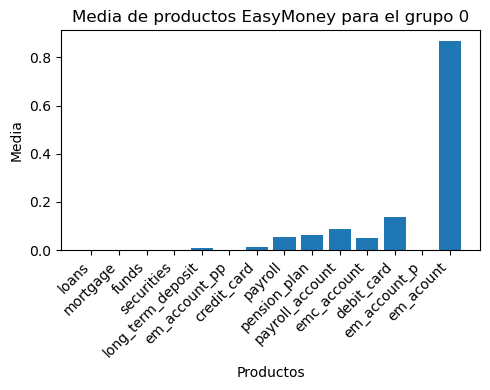

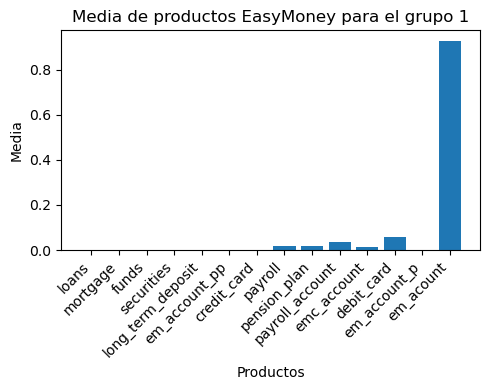

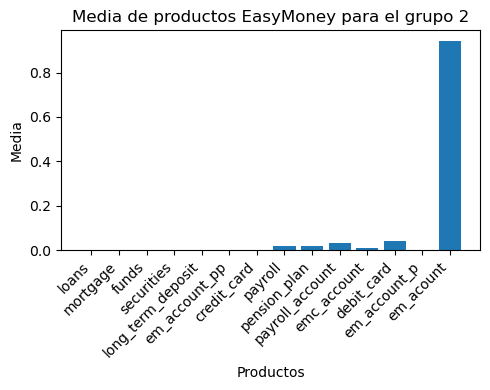

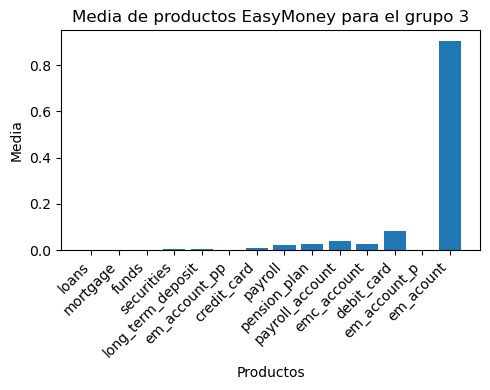

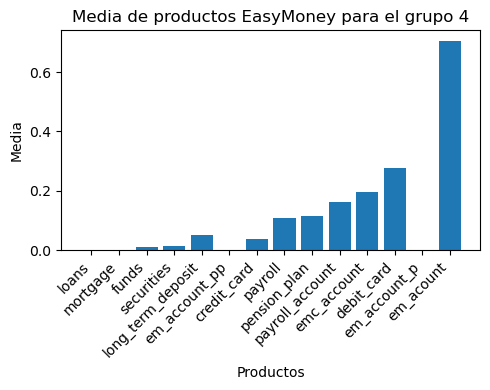

In [116]:
for i in range(5):
    nombre_cluster=f'grupo_{i}'
    grupo = df_mayo.query(f'Cluster == {i}')
    productos_cluster(grupo, str(i))

In [120]:
# Obtener los datos de los grupos 0-5 y concatenarlos en un solo DataFrame
lista_grupos = [df_mayo.query(f'Cluster == {i}').describe().T.iloc[5:19, 1] for i in range(5)]
df_grupos_concatenados = pd.concat(lista_grupos, axis=1)

# Renombrar las columnas con los nombres de los grupos
df_grupos_concatenados.columns = [f'grupo_{i}' for i in range(5)]

df_grupos_concatenados.to_csv('productos_por_cluster.csv')
# Mostrar el resumen de estadísticas descriptivas del DataFrame concatenado
print(df_grupos_concatenados)

                    grupo_0   grupo_1   grupo_2   grupo_3   grupo_4
loans                   0.0  0.000063  0.000008       0.0  0.000206
mortgage                0.0       0.0  0.000008       0.0  0.000197
funds               0.00167  0.000645  0.000284   0.00117  0.010714
securities         0.001927  0.001374  0.000284   0.00261  0.014187
long_term_deposit  0.007193  0.001047   0.00081    0.0054  0.052198
em_account_pp           0.0       0.0       0.0       0.0       0.0
credit_card        0.011689  0.001639  0.001319   0.00675  0.038783
payroll            0.054078  0.018766  0.016738   0.02259  0.106613
pension_plan       0.060758  0.019432  0.017348   0.02475  0.113864
payroll_account    0.086448  0.037332  0.032141   0.03843  0.161953
emc_account         0.04817  0.012211   0.00854   0.02826  0.196375
debit_card         0.135517   0.05927  0.041992  0.081271  0.275188
em_account_p            0.0  0.000011       0.0       0.0  0.000009
em_acount           0.86885  0.928741   0.94364 